In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sklearn

In [4]:
from sklearn.decomposition import PCA

In [65]:
model=PCA(n_components=1) #,whiten=True)

In [10]:
import pandas as pd

In [17]:
import codecs

root = '/Users/alehmann/Documents/Documents/HIH/BDA/BDA2017/data/'
def read_energi_data(f):
    with codecs.open(root+f,encoding='8859') as f:
        col = []
        l=f.readline().strip()
        while l:
            col.append(' '.join(l.split()[1:]))
            l=f.readline().strip()
        
        dat = pd.read_csv(f,sep=';', skipinitialspace=True,lineterminator ='\n',infer_datetime_format=True)
        dat = dat.drop(dat.columns[-1],1)
        
        dat.columns = [dat.columns[0]] + col
        dat = dat.set_index(dat.columns[0])
    return dat



In [71]:
energi = read_energi_data('20161208_onlinedata.txt')
co2 = energi['CO2 udledning']
co2

Dato og tid      
2016-12-08 00:00     190
2016-12-08 00:05     184
2016-12-08 00:10     180
2016-12-08 00:15     175
2016-12-08 00:20     170
2016-12-08 00:25     166
2016-12-08 00:30     166
2016-12-08 00:35     166
2016-12-08 00:40     165
2016-12-08 00:45     164
2016-12-08 00:50     163
2016-12-08 00:55     162
2016-12-08 01:00     163
2016-12-08 01:05     165
2016-12-08 01:10     164
2016-12-08 01:15     165
2016-12-08 01:20     166
2016-12-08 01:25     167
2016-12-08 01:30     169
2016-12-08 01:35     169
2016-12-08 01:40     168
2016-12-08 01:45     166
2016-12-08 01:50     163
2016-12-08 01:55     162
2016-12-08 02:00     160
2016-12-08 02:05     162
2016-12-08 02:10     164
2016-12-08 02:15     164
2016-12-08 02:20     164
2016-12-08 02:25     165
                    ... 
2016-12-08 21:30     300
2016-12-08 21:35     300
2016-12-08 21:40     303
2016-12-08 21:45     303
2016-12-08 21:50     301
2016-12-08 21:55     300
2016-12-08 22:00     298
2016-12-08 22:05     297
2016-12

In [72]:
energi=energi.drop(['Temperatur i Malling','Vindhastighed i Malling'],axis=1)

In [73]:
energi=energi.drop('CO2 udledning',axis=1)

In [74]:
res = model.fit(energi).transform(energi)

In [75]:
print(res.shape,energi.shape)

(288, 1) (288, 17)


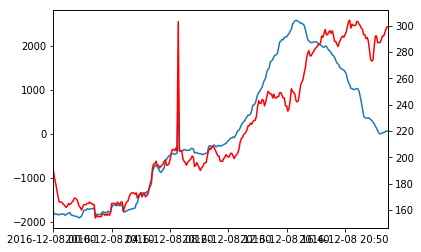

In [84]:
fig,ax = plt.subplots()

ax.plot(res) #plt.scatter(res[:,0],res[:,1])
ax2 = ax.twinx()
co2.plot(style='r')

In [85]:
model.explained_variance_ratio_

array([ 0.79257213])

In [94]:
np.sort(list(zip(model.components_[0],energi.columns)),axis=1)

array([['0.125979969864', 'Centrale kraftværker DK1'],
       ['0.0126390459152', 'Centrale kraftværker DK2'],
       ['0.0598738629661', 'Decentrale kraftværker DK1'],
       ['0.0148157729728', 'Decentrale kraftværker DK2'],
       ['-0.441671028463', 'Vindmøller DK1'],
       ['-0.0702699907432', 'Vindmøller DK2'],
       ['0.674366257839', 'Udveksling Jylland-Norge'],
       ['-0.0651516252871', 'Udveksling Jylland-Sverige'],
       ['-0.153547562863', 'Udveksling Jylland-Tyskland'],
       ['0.300936610692', 'Udveksling Sjælland-Sverige'],
       ['-0.0773244972155', 'Udveksling Sjælland-Tyskland'],
       ['0.0010937978331', 'Udveksling Bornholm-Sverige'],
       ['0.00979959253768', 'Udveksling Fyn-Sjaelland'],
       ['-0.0690489835037', 'Havmøller DK'],
       ['-0.442894138338', 'Landmøller DK'],
       ['-0.00042083450054', 'Solceller DK1'],
       ['-3.39670392645e-05', 'Solceller DK2']], 
      dtype='<U32')

In [95]:
a=list(zip(model.components_[0],energi.columns))

In [97]:
a.sort()
a

[(-0.44289413833772051, 'Landmøller DK'),
 (-0.44167102846258782, 'Vindmøller DK1'),
 (-0.15354756286331547, 'Udveksling Jylland-Tyskland'),
 (-0.077324497215453369, 'Udveksling Sjælland-Tyskland'),
 (-0.070269990743190472, 'Vindmøller DK2'),
 (-0.069048983503659025, 'Havmøller DK'),
 (-0.065151625287061241, 'Udveksling Jylland-Sverige'),
 (-0.00042083450054026617, 'Solceller DK1'),
 (-3.3967039264532464e-05, 'Solceller DK2'),
 (0.0010937978330958185, 'Udveksling Bornholm-Sverige'),
 (0.0097995925376813779, 'Udveksling Fyn-Sjaelland'),
 (0.012639045915224379, 'Centrale kraftværker DK2'),
 (0.014815772972828101, 'Decentrale kraftværker DK2'),
 (0.059873862966092824, 'Decentrale kraftværker DK1'),
 (0.12597996986359525, 'Centrale kraftværker DK1'),
 (0.30093661069170835, 'Udveksling Sjælland-Sverige'),
 (0.67436625783851456, 'Udveksling Jylland-Norge')]